Epoch 0, Loss: 8.895420369599298
Epoch 10, Loss: 14.75952222314357
Epoch 20, Loss: 0.3798710492072115
Epoch 30, Loss: 4.702797384509852
Epoch 40, Loss: 0.23997543254592324
Epoch 50, Loss: 0.24712095944765428
Epoch 60, Loss: 0.24317412759686288
Epoch 70, Loss: 0.22633235690687284
Epoch 80, Loss: 0.18968879715089698
Epoch 90, Loss: 0.17408672439675416
Epoch 100, Loss: 0.16129637691979942
Epoch 110, Loss: 0.15236617361929988
Epoch 120, Loss: 0.1396477865062004
Epoch 130, Loss: 0.13106516320032358
Epoch 140, Loss: 0.12455320262775854
Epoch 150, Loss: 0.11867493256476422
Epoch 160, Loss: 0.11222893959836708
Epoch 170, Loss: 0.10495294044778063
Epoch 180, Loss: 0.09625462784054648
Epoch 190, Loss: 0.08819898674737359
Epoch 200, Loss: 0.08404937098516467
Epoch 210, Loss: 0.07998299555431503
Epoch 220, Loss: 0.07634145666008373
Epoch 230, Loss: 0.07276686576466165
Epoch 240, Loss: 0.06903256262192126
Epoch 250, Loss: 0.06551457998073618
Epoch 260, Loss: 0.062110347506983105
Epoch 270, Loss: 0.

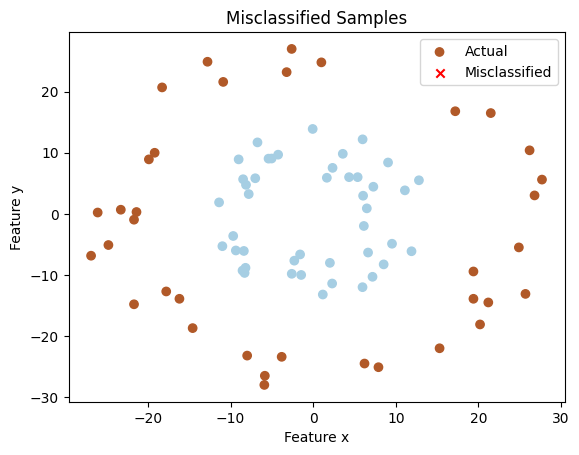

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.biases_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)
        self.biases_output = np.zeros((1, self.output_size))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        # Forward pass
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.biases_hidden
        self.hidden_output = np.maximum(0, self.hidden_input)  # ReLU activation
        self.output_scores = np.dot(self.hidden_output, self.weights_hidden_output) + self.biases_output
        self.output_probs = self.softmax(self.output_scores)
        return self.output_probs

    def backward(self, X, y, output_probs):
        # Backward pass
        m = X.shape[0]

        # Calculate loss and gradient of the loss
        loss = -np.sum(np.log(output_probs[range(m), y])) / m
        d_output = output_probs
        d_output[range(m), y] -= 1
        d_output /= m

        # Update weights and biases
        d_hidden_output = np.dot(self.hidden_output.T, d_output)
        d_biases_output = np.sum(d_output, axis=0, keepdims=True)
        d_hidden_input = np.dot(d_output, self.weights_hidden_output.T)
        d_hidden_input[self.hidden_input <= 0] = 0  # ReLU derivative

        d_weights_input_hidden = np.dot(X.T, d_hidden_input)
        d_biases_hidden = np.sum(d_hidden_input, axis=0, keepdims=True)

        # Update weights and biases using gradient descent
        self.weights_input_hidden -= self.learning_rate * d_weights_input_hidden
        self.biases_hidden -= self.learning_rate * d_biases_hidden
        self.weights_hidden_output -= self.learning_rate * d_hidden_output
        self.biases_output -= self.learning_rate * d_biases_output

        return loss

    def train(self, X_train, y_train, epochs=100, batch_size=32):
        for epoch in range(epochs):
            for i in range(0, len(X_train), batch_size):
                X_batch = X_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size].astype(int)  # Convert to integers

                output_probs = self.forward(X_batch)
                loss = self.backward(X_batch, y_batch, output_probs)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        output_probs = self.forward(X)
        return np.argmax(output_probs, axis=1)


# Load your dataset
df = pd.read_csv("C:\\Users\\Ngugi\\OneDrive\\Pictures\\dataset_circles.csv")

# Assuming 'x', 'y' are features and 'z' is the target
X = df[['x', 'y']].values
y = df['z'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the neural network
input_size = X_train.shape[1]
output_size = len(np.unique(y))
hidden_size = 128

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.01)
nn.train(X_train, y_train, epochs=1000)

# Make predictions on the test set
y_pred = nn.predict(X_test)

# Compare accuracy with sklearn
sklearn_accuracy = accuracy_score(y_test, y_pred)
print(f"Sklearn Accuracy: {sklearn_accuracy}")

# Visualization of misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, label="Actual")
plt.scatter(X_test[misclassified_indices, 0], X_test[misclassified_indices, 1], c='red', marker='x', label="Misclassified")
plt.xlabel('Feature x')
plt.ylabel('Feature y')
plt.legend()
plt.title('Misclassified Samples')
plt.show()
